In [1]:
from IPython.display import display,HTML
display(HTML("<center><h1> Time Series Forecasting Part-1<h1></center>"))



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt

from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('monthly.csv')

In [4]:
df.head()

,Date,Price
0,1833-01,18.93
1,1833-02,18.93
2,1833-03,18.93
3,1833-04,18.93
4,1833-05,18.93


In [5]:
df.shape

(2309, 2)

In [10]:
# Define start and end dates
# Define start and end dates

import pandas as pd

# Sample: Load your dataset
df = pd.read_csv("monthly.csv")

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Define start and end dates
start_date = '1950-01-01'
end_date = '2020-01-08'  # format: YYYY-MM-DD

# Filter the DataFrame to the desired date range
new_df= df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Optional: Check the shape or preview results
print(new_df.shape)
new_df.head()


(841, 2)


,Date,Price
1404,1950-01-01,34.72
1405,1950-02-01,34.72
1406,1950-03-01,34.72
1407,1950-04-01,34.72
1408,1950-05-01,34.72


In [11]:
new_df = df_range.reset_index(drop=True)

NameError: name 'df_range' is not defined

In [12]:
new_df.head()

,Date,Price
1404,1950-01-01,34.72
1405,1950-02-01,34.72
1406,1950-03-01,34.72
1407,1950-04-01,34.72
1408,1950-05-01,34.72


In [ ]:
new_df.shape

In [ ]:
print(f"gold prices starting ranges from data  - {new_df.loc[:,'Date'][0]} to {new_df.loc[:,'Date'][len(df)-1]}")

In [14]:
date=pd.date_range(start='1950-01-31',end='2020-2-1',freq='M')

In [15]:
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31',
               '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30',
               '2019-12-31', '2020-01-31'],
              dtype='datetime64[ns]', length=841, freq='ME')

In [16]:
new_df.columns

Index(['Date', 'Price'], dtype='object')

In [17]:
new_df['month']=date
new_df.drop('Date',axis=1,inplace=True)
new_df=new_df.set_index("month")

In [18]:
df.head()

,Date,Price
0,1833-01-01,18.93
1,1833-02-01,18.93
2,1833-03-01,18.93
3,1833-04-01,18.93
4,1833-05-01,18.93


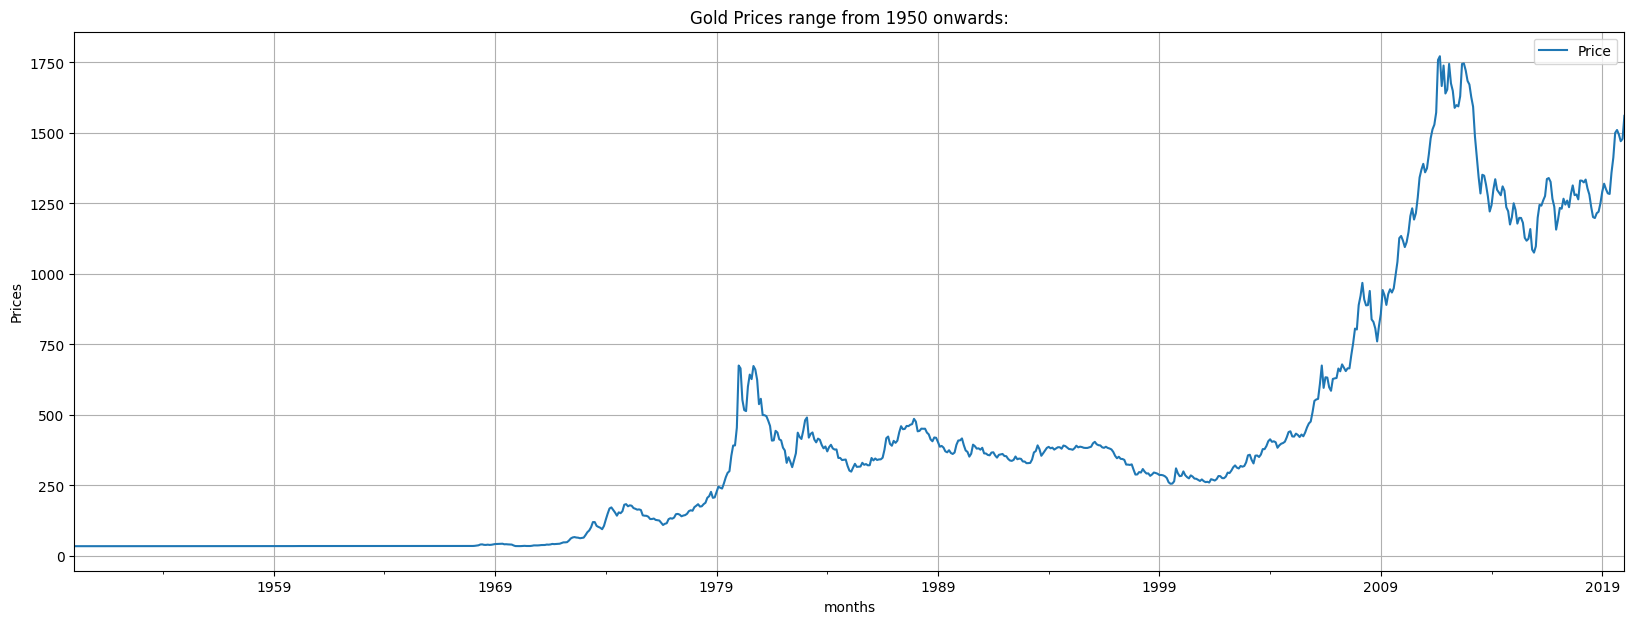

In [19]:
new_df.plot(figsize=(20,7))
plt.title("Gold Prices range from 1950 onwards:")
plt.xlabel("months")
plt.ylabel("Prices")
plt.grid();
plt.show()

In [20]:
round(new_df.describe(),3)

,Price
count,841.000
mean,407.285
std,442.080
min,34.600
25%,35.270
50%,317.200
75%,442.070
max,1772.140


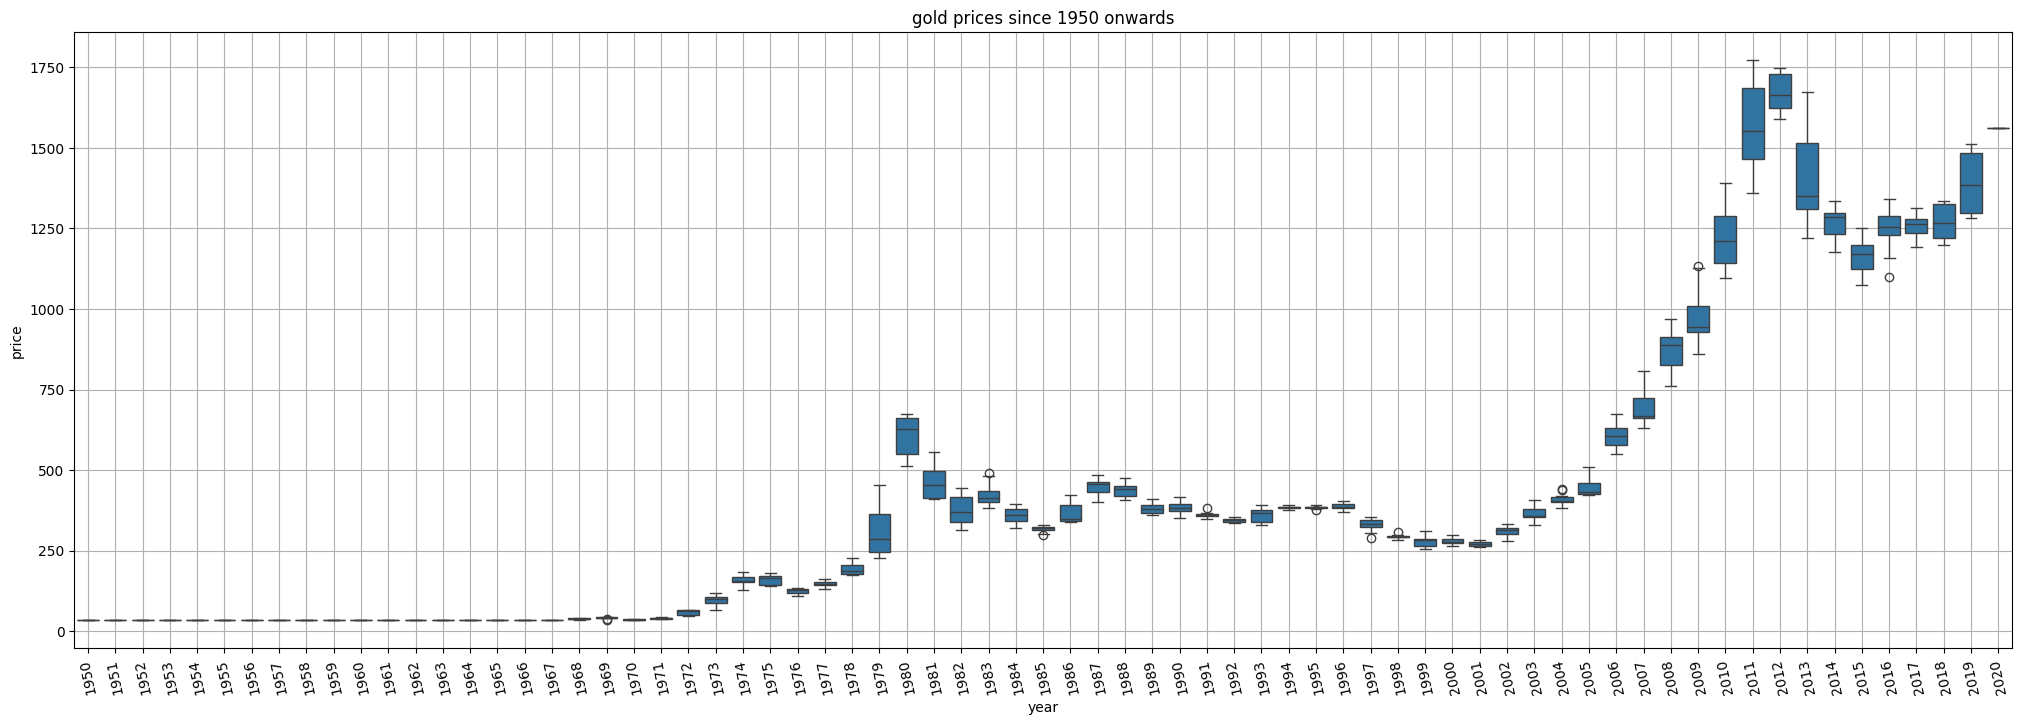

In [21]:
import seaborn as sns
_, ax=plt.subplots(figsize=(25,8))
sns.boxplot(x=new_df.index.year,y=new_df.values[:,0],ax=ax)
plt.title("gold prices since 1950 onwards")
plt.xlabel("year")
plt.ylabel("price")
plt.xticks(rotation=102)
plt.grid();
plt.show()

In [22]:
from statsmodels.graphics.tsaplots import month_plot

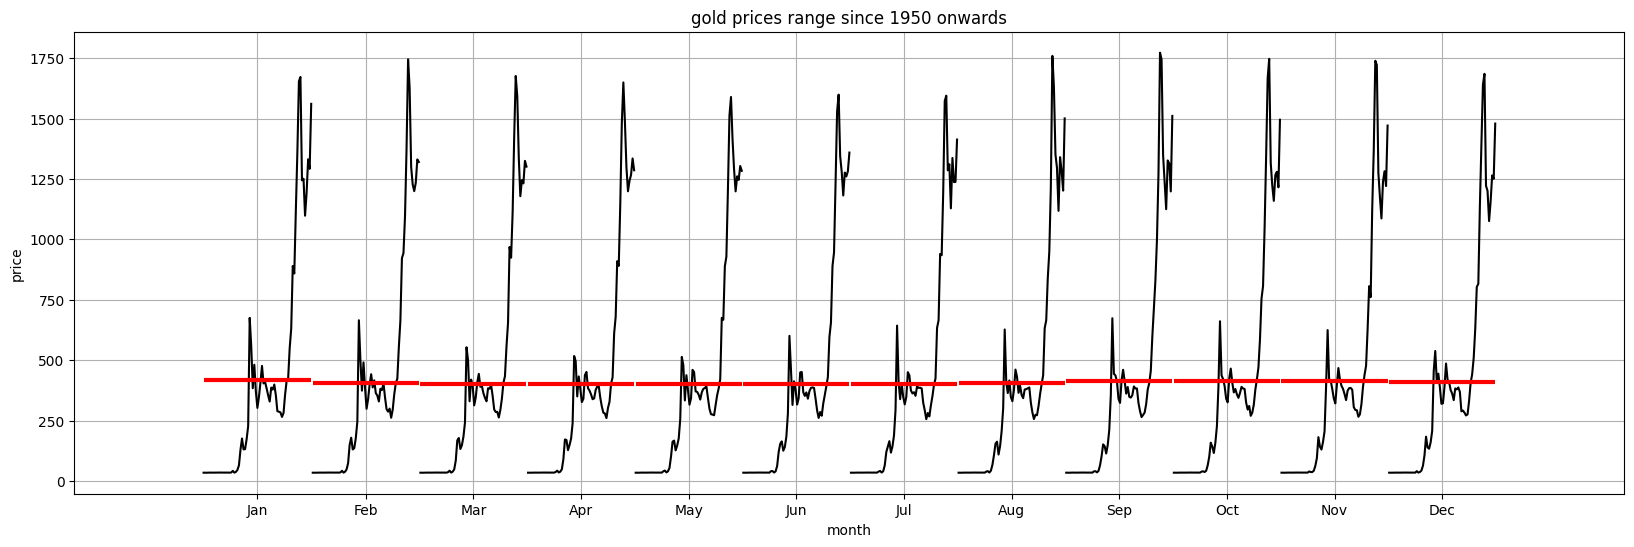

In [23]:
fig,ax=plt.subplots(figsize=(20,6))

month_plot(new_df,ylabel='gold price',ax=ax)

plt.title('gold prices range since 1950 onwards')

plt.xlabel('month')
plt.ylabel('price')
plt.grid();
plt.show()

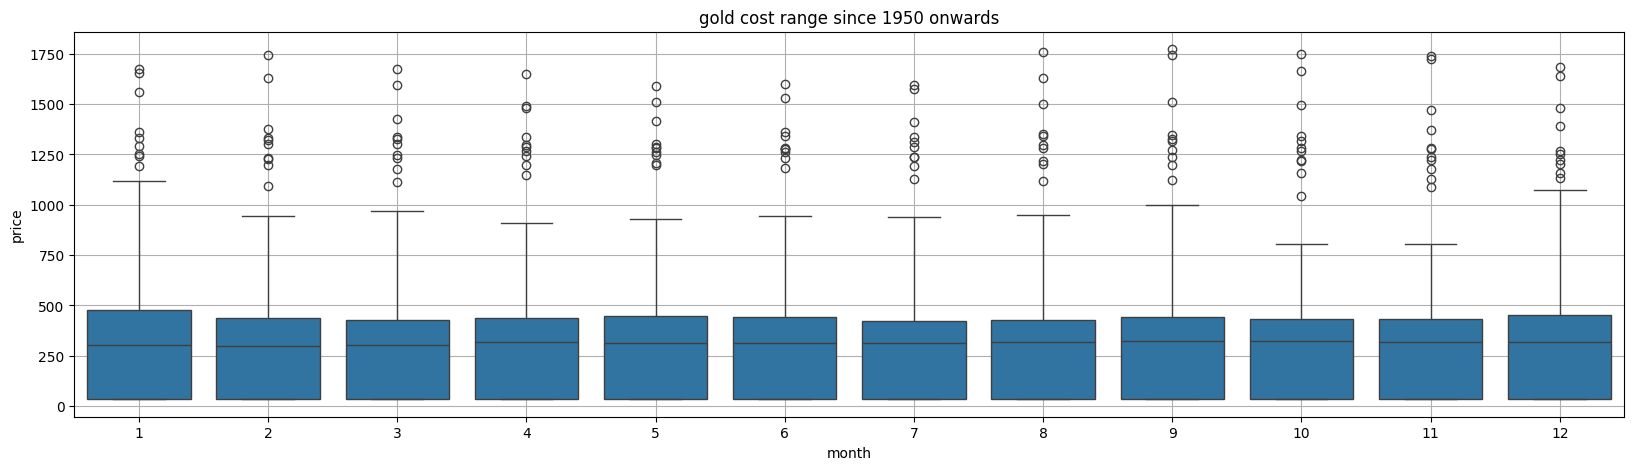

In [24]:
_,ax=plt.subplots(figsize=(20,5))
sns.boxplot(x=new_df.index.month,y=new_df.values[:,0],ax=ax)
plt.title('gold cost range since 1950 onwards')
plt.xlabel('month')
plt.ylabel('price')
plt.grid();
plt.show()

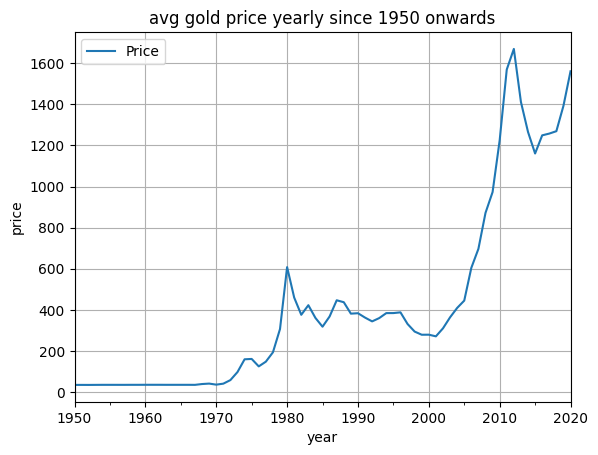

In [25]:
new_df_yearly_sum=new_df.resample('A').mean()

new_df_yearly_sum.plot()
plt.title('avg gold price yearly since 1950 onwards')
plt.xlabel('year')
plt.ylabel('price')
plt.grid();
plt.show()

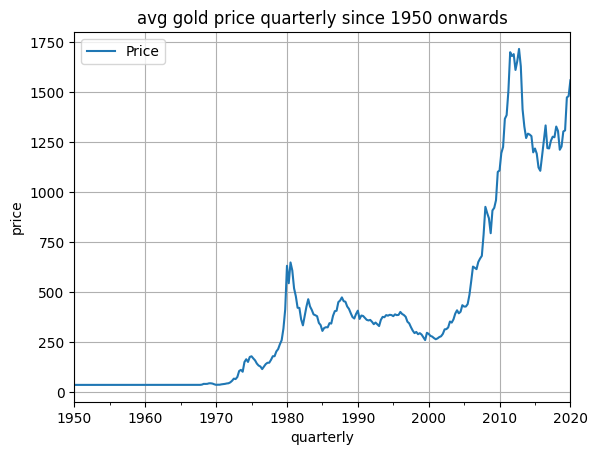

In [26]:
new_df_quarterly_sum=new_df.resample('Q').mean()

new_df_quarterly_sum.plot();
plt.title('avg gold price quarterly since 1950 onwards')
plt.xlabel('quarterly')
plt.ylabel('price')
plt.grid();
plt.show()

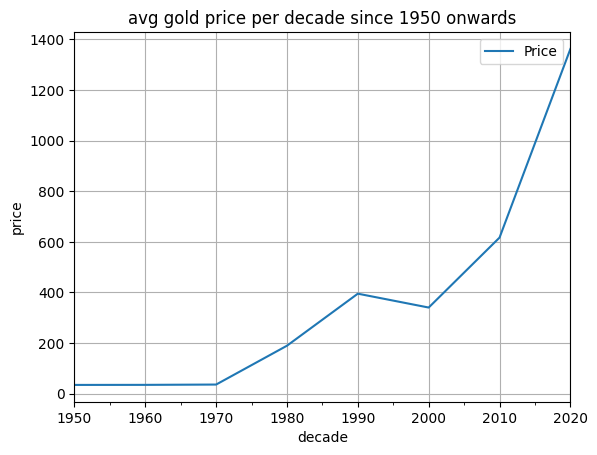

In [27]:
new_df_decade_sum=new_df.resample('10Y').mean()
new_df_decade_sum.plot();
plt.title('avg gold price per decade since 1950 onwards')
plt.xlabel('decade')
plt.ylabel('price')
plt.grid();
plt.show()


In [28]:
from IPython.display import display,HTML

display(HTML("<center><h1> TimeSeries Forecasting Part-2 <h1></center>"))

In [29]:
df1=new_df.groupby(new_df.index.year).mean().rename(columns={'Price':'Mean'})

df1=df1.merge(new_df.groupby(new_df.index.year).std().rename(columns={'Price':'Std'}),left_index=True,right_index=True)
df1['Cov_pct']= ((df1['Std'] / df1['Mean'])*100).round(2)

#df1['Cov_pct'] = ((df1['Std'] / df1['Mean']) * 100).round(2)
#cov_pct is coef of variance

df1.head()


,Mean,Std,Cov_pct
month,,,
1950,34.72,0.0,0.0
1951,34.72,0.0,0.0
1952,34.60,0.0,0.0
1953,34.84,0.0,0.0
1954,35.04,0.0,0.0


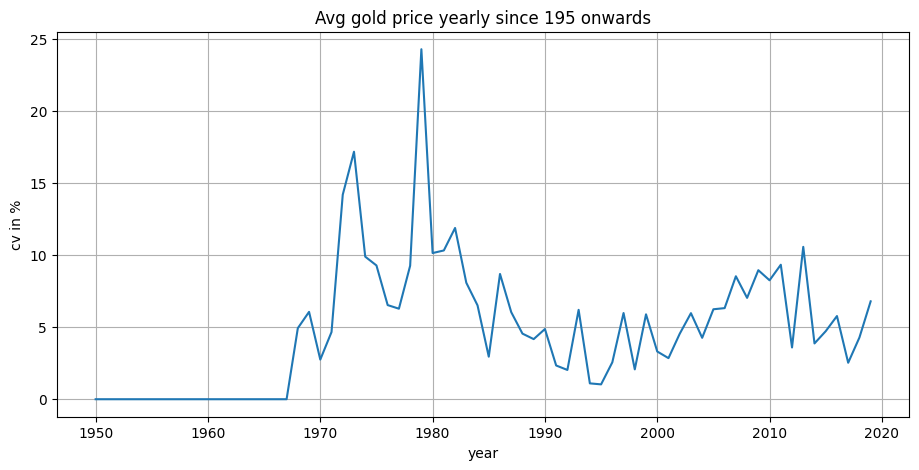

In [30]:
fig,ax=plt.subplots(figsize=(11,5))
df1['Cov_pct'].plot();
plt.title('Avg gold price yearly since 195 onwards')
plt.xlabel('year')
plt.ylabel('cv in %')
plt.grid();
plt.show()


In [31]:
train=new_df[new_df.index.year <=2015]

test=new_df[new_df.index.year >2015]

In [32]:
print(train.shape)

(792, 1)


In [33]:
print(test.shape)

(49, 1)


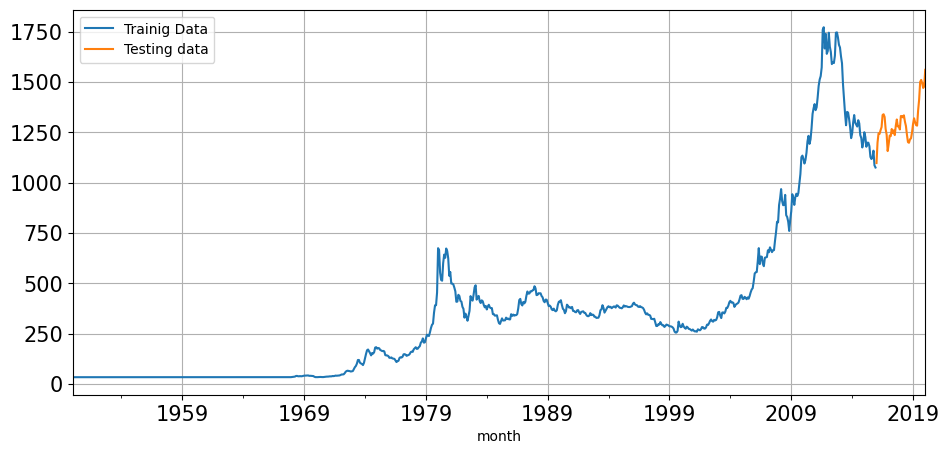

In [34]:
train['Price'].plot(figsize=(11,5),fontsize=15)
test['Price'].plot(figsize=(11,5),fontsize=15)
plt.legend(['Trainig Data','Testing data'])
plt.grid();
plt.show()

In [35]:
train_time=[i+1 for i in range(len(train))]

test_time=[i+len(train)+1 for i in range(len(test))]

len(train_time),len(test_time)

(792, 49)

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lr_train=train.copy()
lr_test=test.copy()

In [38]:
lr_train['time']=train_time
lr_test['time']=test_time

In [39]:
lr=LinearRegression()

In [40]:
lr.fit(lr_train[['time']],lr_train['Price'].values)

LinearRegression()

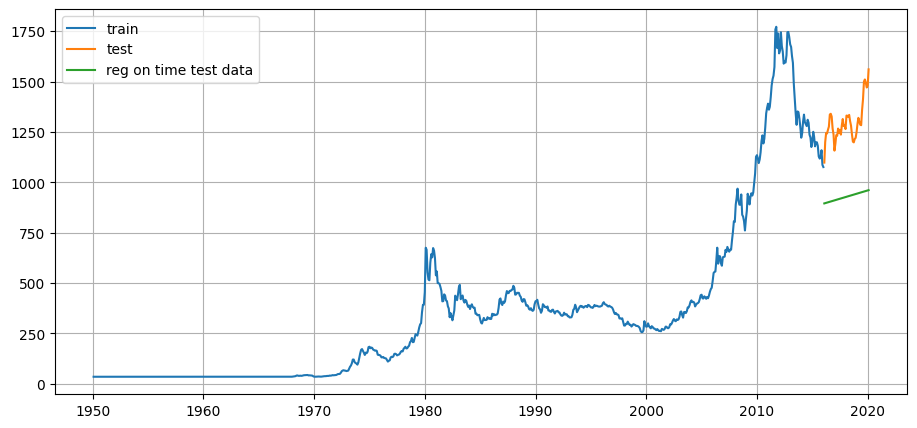

In [41]:
test_predictions_model1=lr.predict(lr_test[['time']])

lr_test['forecast']=test_predictions_model1

plt.figure(figsize=(11,5))
plt.plot(train['Price'],label='train')
plt.plot(test['Price'],label='test')
plt.plot(lr_test['forecast'],label='reg on time test data')
plt.legend(loc='best')
plt.grid();
plt.show()

In [42]:
def mape(actual,pred):
    return round((np.mean(abs(actual - pred)/actual))*100,2)

In [43]:
mape_model1_test=mape(test['Price'].values,test_predictions_model1)
print('Mape is %3.3f' %(mape_model1_test),'%')

Mape is 28.180 %


In [44]:
#mape is a major of prediction accuracy to forecast

In [45]:
results=pd.DataFrame({'Test Mape (%)' : [mape_model1_test]},index=['RegressionOnTime'])

In [46]:
results

,Test Mape (%)
RegressionOnTime,28.18


In [47]:
from sklearn.naive_bayes import MultinomialNB

In [48]:
nbm=MultinomialNB()

In [49]:
nbm_train=train.copy()
nbm_test=test.copy()

In [50]:
nbm_test['nbm']=np.asarray(train['Price'])[len(np.asarray(train['Price']))-1]

In [51]:
nbm_test['nbm'].head()

month
2016-01-31    1075.74
2016-02-29    1075.74
2016-03-31    1075.74
2016-04-30    1075.74
2016-05-31    1075.74
Name: nbm, dtype: float64

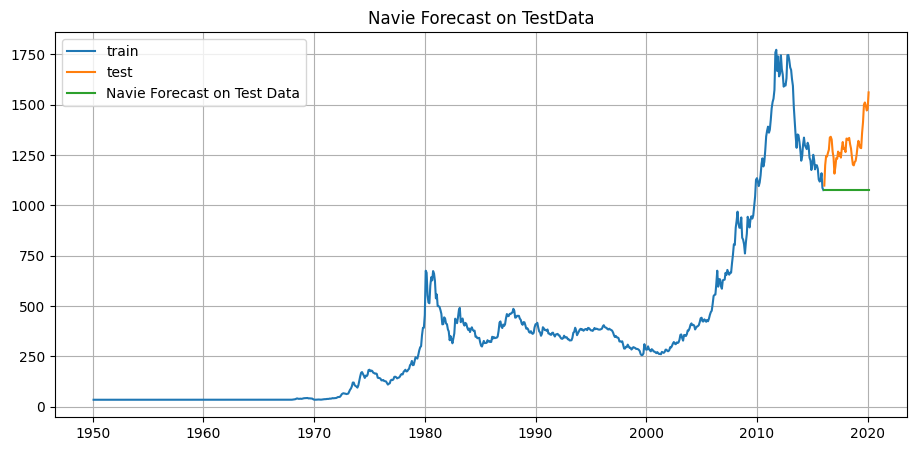

In [52]:
plt.figure(figsize=(11,5))

plt.plot(nbm_train['Price'],label='train')

plt.plot(test['Price'],label='test')

plt.plot(nbm_test['nbm'],label='Navie Forecast on Test Data')

plt.title('Navie Forecast on TestData')
plt.legend(loc='best')
plt.grid();
plt.show()

In [53]:
mape_model2_test=mape(test['Price'].values,nbm_test['nbm'].values)
print('for Navie forecasting on Testdata n mape is  %3.3f' %(mape_model2_test),'%')

for Navie forecasting on Testdata n mape is  16.680 %


In [54]:
results_nbm=pd.DataFrame({'Test MAPE (%)' : [mape_model2_test]},index=['Naivebayes model'])

In [55]:
results=pd.concat([results,results_nbm])

In [56]:
results

,Test Mape (%),Test MAPE (%)
RegressionOnTime,28.18,NaN
Naivebayes model,NaN,16.68


In [57]:
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt

In [58]:
final_model=ExponentialSmoothing(new_df,
                                trend='additive',
                                seasonal='additive').fit(smoothing_level=0.5,
                                                        smoothing_trend=0.2,
                                                        smoothing_seasonal=0.8)

In [59]:
mape_final_model=mape(new_df['Price'].values,final_model.fittedvalues)

print('MAPE : ' , mape_final_model)

MAPE :  13.96


In [60]:
predictions=final_model.forecast(steps=len(test))
                                             

In [61]:
pred_df=pd.DataFrame({'lower CI': predictions - 1.96 * np.std(final_model.resid,ddof=1),
                     'prediction':predictions,
                     'Upper CI' : predictions + 1.96 * np.std(final_model.resid,ddof=1)})

In [62]:
pred_df.head()

,lower CI,prediction,Upper CI
2020-02-29,1515.274615,1614.619347,1713.964078
2020-03-31,1565.799315,1665.144046,1764.488777
2020-04-30,1657.999384,1757.344115,1856.688847
2020-05-31,1763.209795,1862.554527,1961.899258
2020-06-30,1892.074421,1991.419153,2090.763884


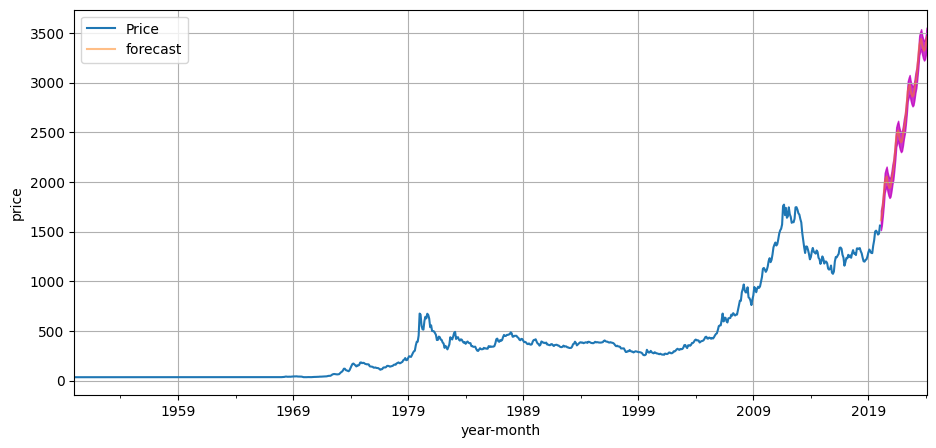

In [63]:
axis=new_df.plot(label='actual',figsize=(11,5))

pred_df['prediction'].plot(ax=axis,label='forecast',alpha=0.5)

axis.fill_between(pred_df.index,pred_df['lower CI'],pred_df['Upper CI'],color='m',alpha=0.8)

axis.set_xlabel('year-month')
axis.set_ylabel('price')
plt.legend(loc='best')
plt.grid();
plt.show()


In [68]:
print('fine done')

fine done
